In [13]:
# !pip install factor_analyzer


Factor Loadings:
 [[ 0.1522865   0.76591501]
 [-0.51522425  0.1763118 ]
 [-0.06087448  0.33138829]
 [-0.42927963 -0.13681125]
 [ 0.19232238  0.38897441]
 [ 0.81135296  0.25656164]
 [ 0.92178621  0.16891227]
 [-0.57466711 -0.08298225]
 [ 0.60073386  0.16625843]
 [-0.34951378  0.77768682]
 [ 0.67018592 -0.27058309]
 [ 0.84154366 -0.10174279]
 [ 0.48149986  0.6618113 ]]


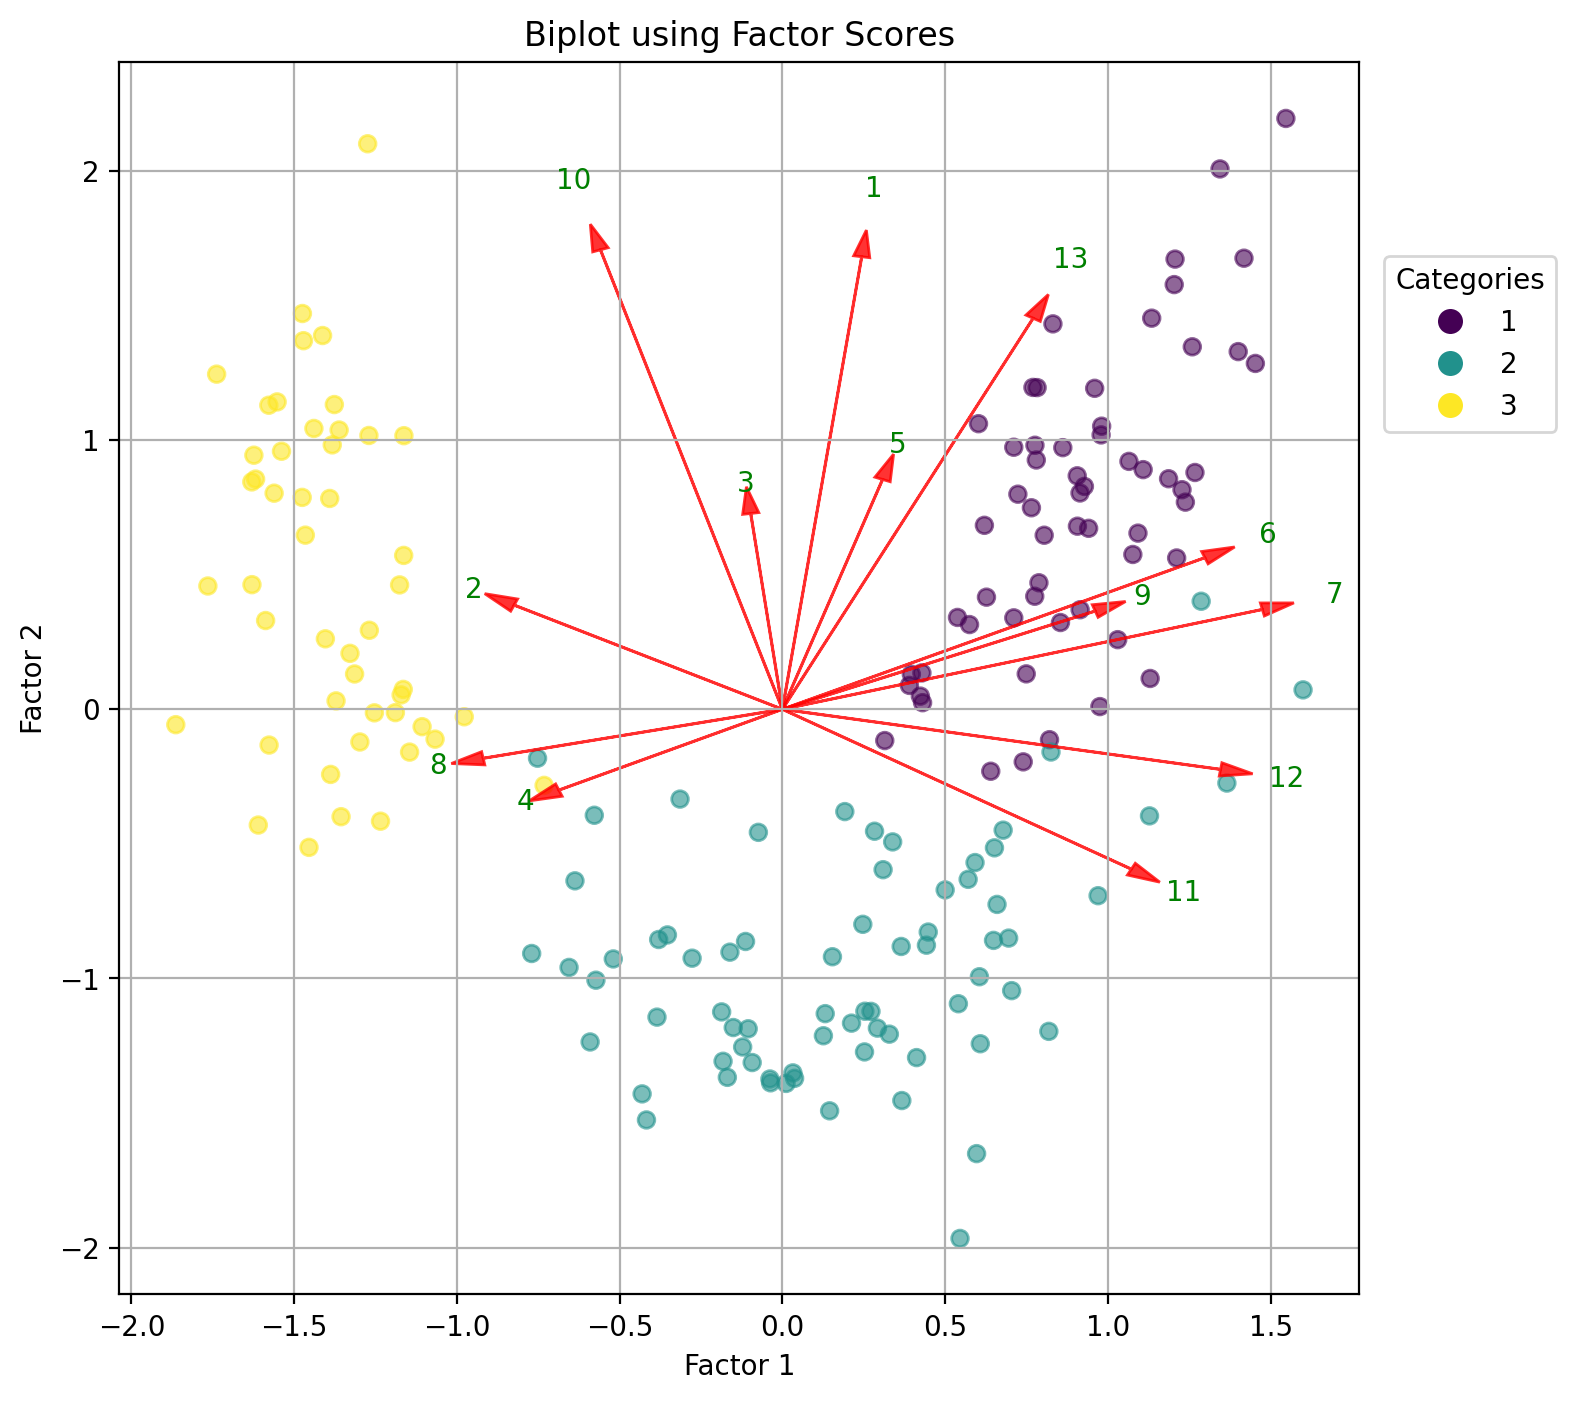

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from matplotlib.lines import Line2D

# Load data from CSV
# Assuming your CSV file is named 'data.csv'
data = pd.read_csv('wine.data', header=None)

# Separate the labels and features
labels = data.iloc[:, 0].values  # First column for labels
features = [
    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalinity of ash',
    'Magnesium',
    'Total phenols',
    'Flavanoids',
    ''
 	3) Ash
	4) Alcalinity of ash  
 	5) Magnesium
	6) Total phenols
 	7) Flavanoids
 	8) Nonflavanoid phenols
 	9) Proanthocyanins
	10)Color intensity
 	11)Hue
 	12)OD280/OD315 of diluted wines
 	13)Proline ]

# Step 1: Perform Exploratory Factor Analysis (EFA)
fa = FactorAnalyzer(n_factors=2, rotation='varimax')  # You can adjust the number of factors as needed
fa.fit(features)

# Get factor loadings
loadings = fa.loadings_
print("Factor Loadings:\n", loadings)

# Step 2: Obtain factor scores
factor_scores = fa.transform(features)

# Step 3: Create biplot
def biplot(score, coeff, feature_labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    
    # Create a scatter plot of factor scores colored by labels
    plt.figure(figsize=(8, 8), dpi=200)
    scatter = plt.scatter(xs, ys, c=labels, cmap='viridis', alpha=0.6)

    # Plot the factor loadings (coefficients)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0] * max(xs), coeff[i, 1] * max(ys),
                  color='r', alpha=0.8, head_width=0.05, head_length=0.1)
        if feature_labels is None:
            plt.text(coeff[i, 0] * max(xs) * 1.15, coeff[i, 1] * max(ys) * 1.15,
                     "Var" + str(i + 1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * max(xs) * 1.15, coeff[i, 1] * max(ys) * 1.15,
                     feature_labels[i], color='g', ha='center', va='center')

    plt.xlabel("Factor 1")
    plt.ylabel("Factor 2")
    plt.title("Biplot using Factor Scores")
    plt.grid()

    # Create a custom legend
    unique_labels = np.unique(labels)
    legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=10, label=label) for label in unique_labels]
    plt.legend(handles=legend_elements, title='Wine Type', loc=(1.02, 0.7))

# Step 4: Visualize the biplot
biplot(factor_scores, loadings, feature_labels=features.columns)
plt.show()
